In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#get the data
import csv
f = open('cheat.csv', 'rb') #open file for reading
reader = csv.reader(f)
headers = reader.next() #get file headers

#read data to list
data = []
for line in reader:
    data.append(line)
    
#transpose data into columns
data = [[float(y) for y in x] for x in transpose(data)]

x = data[0]
n = data[1]
mu = data[2]


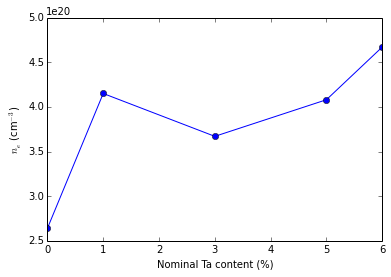

In [3]:
#plot of carrier conc. vs content
plot(x, n, '-o')
xlabel(headers[0])
ylabel(headers[1])

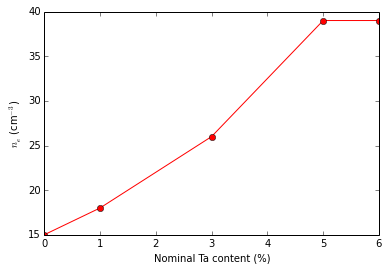

In [4]:
#plot of carrier conc. vs mobility
plot(x, mu, '-o', color = 'red')
xlabel(headers[0])
ylabel(headers[1])

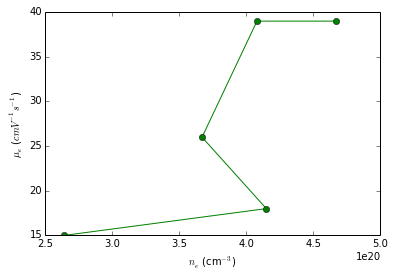

In [5]:
#plot of mobility vs carrier conc.
plot(n, mu, '-o', color='green')
xlabel(headers[1])
ylabel(headers[2])

#!!! Warning, point at n = 3.5 x10^20 is artificial !!!#



<h1>Analysis</h1>
[<h2>The Seto Model</h2>](/file/seto.pdf)<br/>
Assumption: At the grain boundaries (GB) a population of filled and charged strap states exist within the band gap. This causes the conduction band to bend upwards at each GB forming a barrier to charge transport.

<h3>Expression for iter-grain mobility $\mu_{ig}$</h3>


\begin{equation}
\mu_{ig} = \mu_0\exp\left(-\frac{\Phi_B}{k_BT}\right)
\end{equation}

where,

1. $$\Phi_B = \frac{e^2n_t^2}{8\varepsilon_{\infty}\varepsilon_0n_e}$$
    - $\Phi_B$ is the barrier  height at the GB
    - $n_t$ is the trap density - units cm$^{-2}$
2. $$\mu_0 = \frac{L}{\sqrt{2\pi m_ek_BT}}$$
    - $\mu_0$ is intra-grain mobility
    - $L$ is grain size
    
<h3>Expression for effective mobility $\mu_{eff}$</h3><br/>
In a real film the mobility will be limited by ionized impurity scattering. We'll assume that the level of scattering is independent of carrier concentration for the time being (it isn't!) and define a constant upper limit to the mobility, $\mu_{ii}$. We combine $\mu_{ig}$ and $\mu_{ii}$ according to:

$$\frac{1}{\mu_{eff}} = \frac{1}{\mu_{ig}} + \frac{1}{\mu_{ii}}$$
    




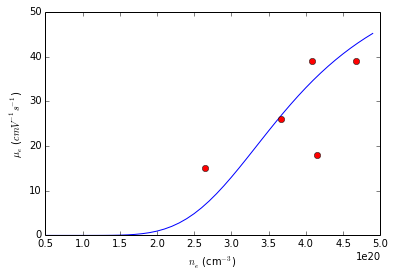

In [6]:
from ipywidgets import *

e = 1.602e-19
permInf = 8.3 #permittivity for single crystal ZnO
permZero = 8.85e-12 #permittivity of free space
me = 0.35 #effective mass
mzero = 9.11e-31 #electron mass
kB = 1.38e-23 #Boltzmann
T = 300 #Kelvin


def phiB(n, nt = 1.0e14):
    '''Barrier Height'''
    value = (e*nt)**2/(8*permInf*permZero*n) 
    return value

def muZero(L = 5):
    '''intra-grain mobility'''
    value = L*1e-7/sqrt(2*pi*me*kB*T) #L converted to cm here using factor 1e-7
    return value

def muig(n, nt=1, L=5):
    '''iter-grain mobility'''
    units=1e14 #cm^-3
    value = muZero(L)*exp(-(phiB(n, nt*units))/(kB*T))
    return value

def mueff(muii, nt, L):
    '''Effective Mobility
       Limited by ionized impurity scattering
       Constant value of muii used as approximation'''
    value = ((1/muig(ne, nt, L)) + 1/muii)**-1
    return value

def setoPlot(muii, nt, L):
    plot(ne, mueff(muii, nt, L))
    plot(array(n), mu, 'o', color='red')
    xlabel(headers[1])
    ylabel(headers[2])
    

    

#define carrier conc. range of interest   
ne = arange(0.5, 5, 0.1)*1e20   

#bind sliders to variables
nt_slider = FloatSlider(min=0.1, max=10, step=0.01, value=4)
L_slider = FloatSlider(min=0.01, max=5, step=0.01, value = 4.3)
muii_slider = FloatSlider(min=0.001, max=100, step = 1, value = 66)

#generate interactive plot
interactive(setoPlot, nt=nt_slider, L=L_slider, muii=muii_slider)
